In [2]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score


In [3]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [4]:
#df = pd.read_csv('../input/mytest.csv')
df = pd.read_csv("C:\\Users\\HP\\Downloads\\bigml_59c28831336c6604c800002a.csv")

print (df.shape)

#df.dtypes

(3333, 21)


In [5]:
# Load data
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


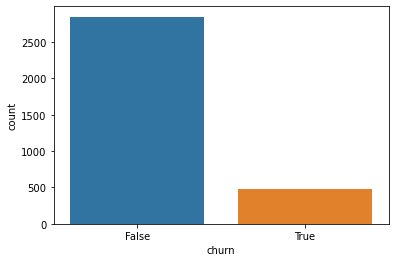

In [6]:
y = df["churn"].value_counts()
sns.countplot(x="churn", data=df)

plt.show()

In [7]:
y_True = df["churn"].value_counts()[True]
churn_percentage = (y_True / df["churn"].shape[0]) * 100
print("Churn Percentage =", churn_percentage)

Churn Percentage = 14.491449144914492


In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn by State

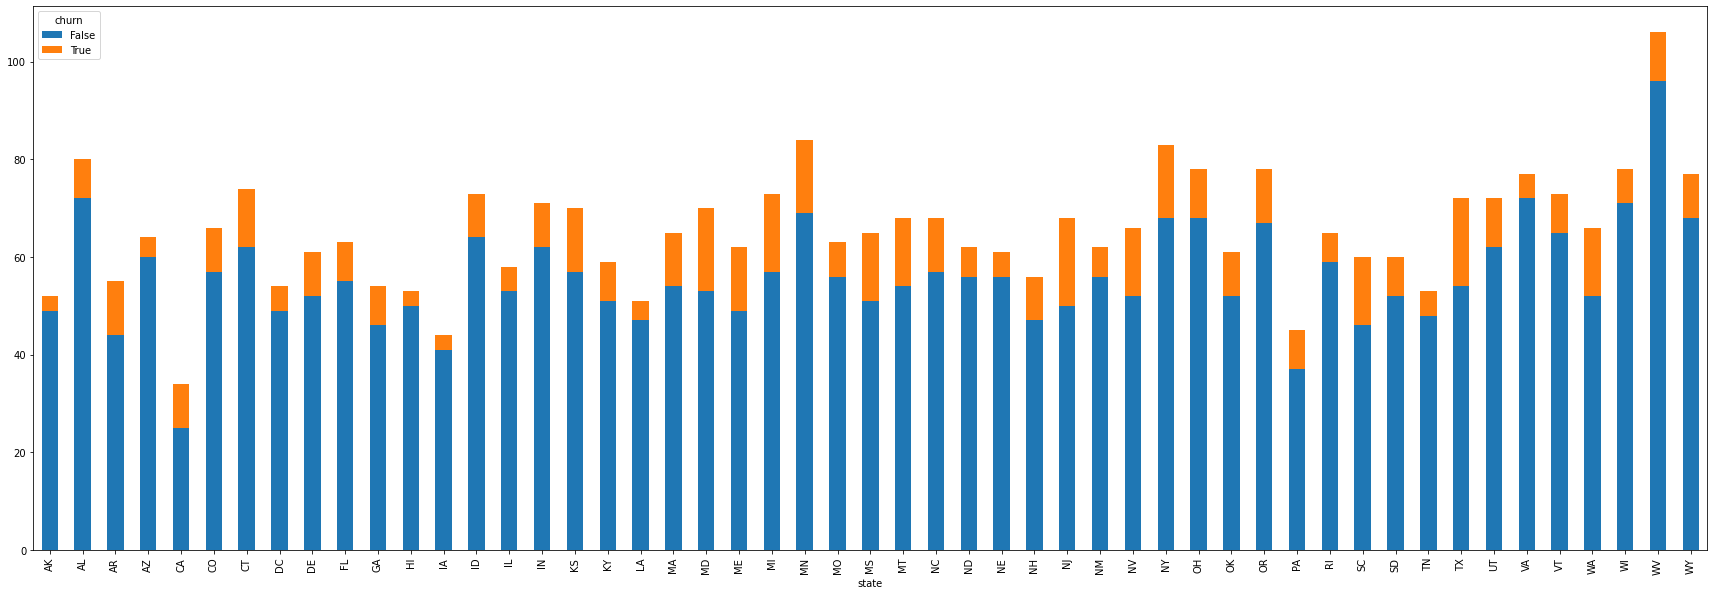

In [9]:
grouped_data = df.groupby(["state", "churn"]).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(30, 10))

plt.show()

### Churn by Area Code

<AxesSubplot:xlabel='area code'>

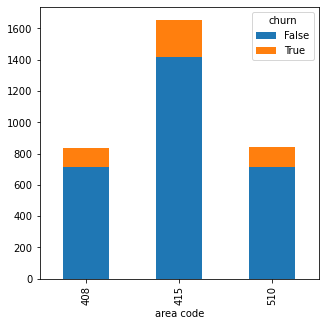

In [10]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by Customer with International Plan

<AxesSubplot:xlabel='international plan'>

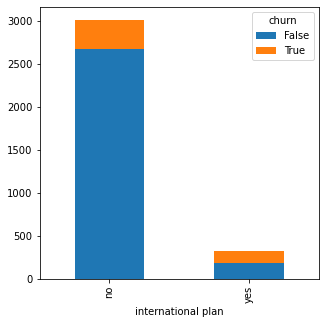

In [11]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by Customer with voice mail plan

<AxesSubplot:xlabel='voice mail plan'>

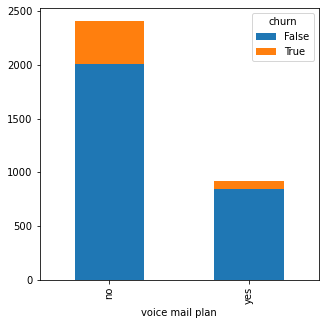

In [12]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Handle Categorical Cols - Label Encode

In [13]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [14]:
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
df.dtypes

state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [15]:
df.shape

(3333, 21)

In [16]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Strip of Response values

In [17]:
y = df['churn'].to_numpy().astype(int)
y.size

3333

In [18]:
df.drop(["phone number","churn"], axis = 1, inplace=True)


In [19]:
df.head(3)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


### Build Feature Matrix

In [20]:
X = df.values.astype(float)
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

### Stratified Cross Validation - Since the Response values are not balanced

In [21]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y):
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [22]:

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


In [30]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, RandomForestClassifier))))


Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.86
Random Forest Classifier:      0.95


### Confusion metrics

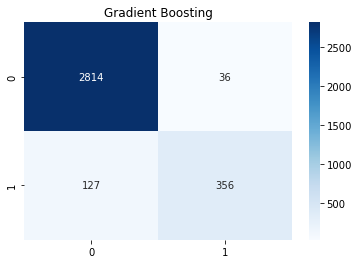

In [24]:
# Calculate the confusion matrix
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))

# Plot the confusion matrix heatmap
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap='Blues')
title = 'Gradient Boosting'
plt.title(title)
plt.show()

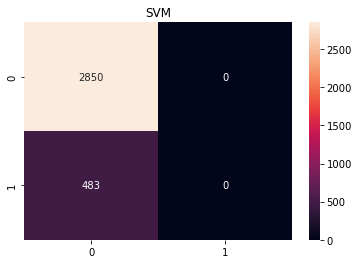

In [25]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True, fmt='')
plt.title('SVM')
plt.show()

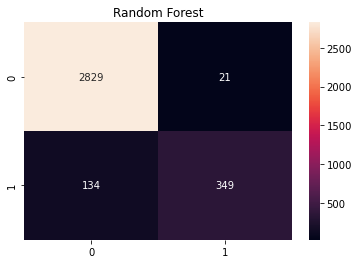

In [26]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True, fmt='')
plt.title('Random Forest')
plt.show()

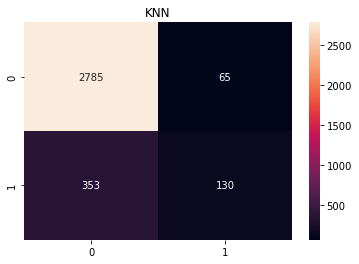

In [27]:
k_neighbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True, fmt='')
plt.title('KNN')
plt.show()

### Classification report

In [31]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier), zero_division=1)))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC), zero_division=1)))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier), zero_division=1)))


Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.91      0.74      0.82       483

    accuracy                           0.95      3333
   macro avg       0.93      0.87      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      2850
           1       1.00      0.00      0.00       483

    accuracy                           0.86      3333
   macro avg       0.93      0.50      0.46      3333
weighted avg       0.88      0.86      0.79      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2850
           1       0.94      0.75      0.84       483

    accuracy                           0.96      3333
   macro avg       0.95      0.87     

### Final Model Selection

In [32]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)


GradientBoostingClassifier()

[0.00191808 0.00330407 0.00164259 0.09486837 0.04024938 0.04304589
 0.13031122 0.00508423 0.15985823 0.08649942 0.00081427 0.05640078
 0.01382024 0.00085334 0.00448002 0.06171743 0.11049549 0.02160684
 0.16303013]


<AxesSubplot:>

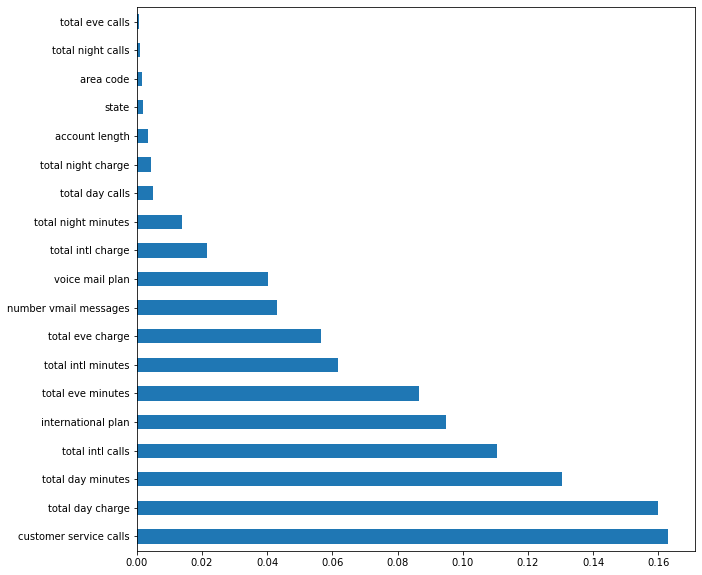

In [33]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print(feature_importance)

feat_importances = pd.Series(feature_importance, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh', figsize=(10, 10))
